Group 7_Group Assessment

1. Import libraries/modules

In [3]:
######## To read and manupulate data
import pandas as pd
import numpy as np
######## To run regressions
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from sklearn.model_selection import train_test_split
#split data to training and for validation
######## For plotting
import seaborn as sns
import matplotlib.pyplot as plt
# this is needed to see the plots inside the notebook
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
#Q2:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score,auc, roc_curve

2. Read Data

In [6]:
file_path='data/realtor-data-ny.csv'
data = pd.read_csv(file_path, low_memory=False)

3. Data Cleaning

In [8]:
# Check the data types of all columns
print("Column data types before conversion:")
print(data.dtypes)

# Define columns to clean
critical_columns = ['price', 'bed', 'bath', 'house_size']
additional_columns = ['acre_lot', 'prev_sold_date']

# Convert critical columns to numeric
for col in critical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert additional columns if needed
data['acre_lot'] = pd.to_numeric(data['acre_lot'], errors='coerce')
data['prev_sold_date'] = pd.to_datetime(data['prev_sold_date'], errors='coerce', format='%d/%m/%Y')

# Remove rows with missing values in critical columns
cleaned_data = data.dropna(subset=critical_columns)

Column data types before conversion:
status             object
bed                 int64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size          int64
prev_sold_date     object
price               int64
nyc                object
dtype: object


In [9]:
# Display summary after cleaning
print("Summary of dataset after fixing mixed types:")
print(cleaned_data.info())

Summary of dataset after fixing mixed types:
<class 'pandas.core.frame.DataFrame'>
Index: 83946 entries, 0 to 84039
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status          83946 non-null  object        
 1   bed             83946 non-null  int64         
 2   bath            83946 non-null  float64       
 3   acre_lot        83946 non-null  float64       
 4   city            83944 non-null  object        
 5   state           83946 non-null  object        
 6   zip_code        83942 non-null  float64       
 7   house_size      83946 non-null  int64         
 8   prev_sold_date  56576 non-null  datetime64[ns]
 9   price           83946 non-null  int64         
 10  nyc             83946 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 7.7+ MB
None


In [10]:
# check duplicates
duplicates = cleaned_data[cleaned_data.duplicated()]

# count the numbers of duplicate rows
duplicate_count = cleaned_data.duplicated().sum()
print(f"number of duplicates: {duplicate_count}")

number of duplicates: 74785


In [11]:
# drop duplicates
clean_data = cleaned_data.drop_duplicates()
clean_data.reset_index(drop= True, inplace=True)

In [12]:
# Make data more readable
final_data = clean_data[clean_data['price'] > 0].copy() # Filter out non-positive prices
final_data['log_price'] = np.log(clean_data['price'])
final_data['log_house_size'] = np.log(clean_data['house_size'])

4. Summary Statistics

In [14]:
# We start exploring the data
# First, we get the basic information
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status          9161 non-null   object        
 1   bed             9161 non-null   int64         
 2   bath            9161 non-null   float64       
 3   acre_lot        9161 non-null   float64       
 4   city            9159 non-null   object        
 5   state           9161 non-null   object        
 6   zip_code        9159 non-null   float64       
 7   house_size      9161 non-null   int64         
 8   prev_sold_date  6142 non-null   datetime64[ns]
 9   price           9161 non-null   int64         
 10  nyc             9161 non-null   object        
 11  log_price       9161 non-null   float64       
 12  log_house_size  9161 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 930.5+ KB


In [15]:
# We can get some general info about the data (columns)
final_data.describe()

,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,log_price,log_house_size
count,9161.000000,9161.000000,9161.000000,9159.000000,9161.000000,6142,9.161000e+03,9161.000000,9161.000000
mean,3.888331,2.951970,15.216553,11173.838956,2444.098679,2007-11-02 17:41:35.734288640,1.299758e+06,13.565847,7.609093
min,1.000000,1.000000,0.000000,6390.000000,122.000000,1971-03-24 00:00:00,2.000000e+04,9.903488,4.804021
25%,3.000000,2.000000,0.060000,10469.000000,1364.000000,2000-08-25 18:00:00,4.800000e+05,13.081541,7.218177
50%,4.000000,3.000000,0.140000,10990.000000,1978.000000,2008-07-07 12:00:00,7.399990e+05,13.514404,7.589842
75%,5.000000,4.000000,0.660000,11580.000000,2824.000000,2017-02-15 00:00:00,1.249000e+06,14.037854,7.945910
max,42.000000,43.000000,100000.000000,14534.000000,112714.000000,2022-10-31 00:00:00,1.690000e+08,18.945409,11.632609
std,2.059348,1.798801,1048.639066,858.075659,2415.340981,NaN,3.090303e+06,0.888256,0.578519


In [16]:
# We can start looking at the first lines of the file
sorted_final_data = final_data.sort_values(by='price', ascending=True) #sort data by price
sorted_final_data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,nyc,log_price,log_house_size
8350,for_sale,3,1.0,0.4,Ticonderoga,New York,12883.0,1584,2012-03-28,20000,No,9.903488,7.367709
3089,for_sale,2,1.0,2.5,Hebron,New York,12865.0,672,1996-08-30,23000,No,10.043249,6.510258
8865,for_sale,3,2.0,1.1,Whitehall,New York,12887.0,2352,2006-06-13,24900,No,10.122623,7.763021
3928,for_sale,3,2.0,0.9,Mineville,New York,12956.0,1216,NaT,29900,No,10.305614,7.103322
2882,for_sale,3,1.0,2.0,Granville,New York,12832.0,1396,2008-07-15,29950,No,10.307285,7.241366


In [17]:
# We can look also at the last part of the data
sorted_final_data.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,nyc,log_price,log_house_size
5367,for_sale,5,7.0,3.43,New York City,New York,10019.0,8274,NaT,49900000,Yes,17.725532,9.020873
5108,for_sale,6,8.0,0.22,New York City,New York,10028.0,6891,2008-09-12,50000000,Yes,17.727534,8.837971
4909,for_sale,6,10.0,0.06,New York City,New York,10065.0,14825,NaT,55000000,Yes,17.822844,9.604070
4827,for_sale,8,10.0,0.05,New York City,New York,10023.0,12000,NaT,65000000,Yes,17.989898,9.392662
5325,for_sale,6,9.0,0.79,New York City,New York,10022.0,8255,NaT,169000000,Yes,18.945409,9.018574


In [18]:
# Calculate the mediam and mode of 'price', 'bed', 'bath', 'house_size'
for col in critical_columns:
    median = final_data[col].median()
    mode = final_data[col].mode()
    print(median, mode)

739999.0 0    799000
Name: price, dtype: int64
4.0 0    3
Name: bed, dtype: int64
3.0 0    2.0
Name: bath, dtype: float64
1978.0 0    2000
Name: house_size, dtype: int64


In [19]:
# Check the details of 'status', 'city', 'state' and 'nyc'
unique_values = final_data[['status', 'city', 'state', 'nyc']].apply(pd.Series.unique)
print(unique_values)

status                                           [for_sale]
city      [Accord, Addisleigh Park, Airmont, Albertson, ...
state                                            [New York]
nyc                                               [No, Yes]
dtype: object


In [20]:
# Check how many different cities in New York state
unique_counts = final_data['city'].value_counts()
print(unique_counts)

city
Staten Island     1303
Brooklyn           875
New York City      866
Bronx              528
Yonkers            138
                  ... 
Stuyvesant Hts       1
Stuyvesant           1
Milton               1
Mongaup Valley       1
Millwood             1
Name: count, Length: 457, dtype: int64


In [21]:
# Check how many houses in nyc 
nyc_yes_count = (final_data['nyc'] == 'Yes').sum()
print(nyc_yes_count)
nyc_no_count = (final_data['nyc'] == 'No').sum()
print(nyc_no_count)

3056
6105


In [22]:
# Check the critical column in nyc
house_nyc_yes=final_data[final_data['nyc'] == 'Yes']
house_nyc_yes.describe()

,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,log_price,log_house_size
count,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,1859,3.056000e+03,3056.000000,3056.000000
mean,3.863547,3.003272,1.343236,10618.836715,2253.475458,2007-04-18 13:18:37.374932736,1.998642e+06,13.977094,7.519597
min,1.000000,1.000000,0.000000,10001.000000,122.000000,1973-07-23 00:00:00,8.990000e+04,11.406453,4.804021
25%,3.000000,2.000000,0.050000,10303.000000,1216.000000,2000-03-23 12:00:00,6.789720e+05,13.428335,7.103322
50%,3.000000,3.000000,0.060000,10312.000000,1799.000000,2008-02-29 00:00:00,9.980000e+05,13.813509,7.494986
75%,5.000000,4.000000,0.120000,11215.000000,2664.000000,2016-01-20 00:00:00,1.695000e+06,14.343193,7.887584
max,42.000000,43.000000,2700.000000,11694.000000,29363.000000,2022-04-04 00:00:00,1.690000e+08,18.945409,10.287491
std,2.465480,1.982903,50.149067,494.570560,1890.218304,NaN,4.870630e+06,0.834508,0.598235


In [23]:
# check the critical column outside nyc
house_nyc_yes=final_data[clean_data['nyc'] == 'No']
house_nyc_yes.describe()

,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,log_price,log_house_size
count,6105.000000,6105.00000,6105.000000,6103.000000,6105.000000,4283,6.105000e+03,6105.000000,6105.000000
mean,3.900737,2.92629,22.161165,11451.749304,2539.519574,2008-01-27 18:09:39.967312384,9.499147e+05,13.359988,7.653892
min,1.000000,1.00000,0.000000,6390.000000,300.000000,1971-03-24 00:00:00,2.000000e+04,9.903488,5.703782
25%,3.000000,2.00000,0.090000,10583.000000,1454.000000,2000-11-08 12:00:00,3.899000e+05,12.873646,7.282074
50%,4.000000,3.00000,0.300000,11356.000000,2037.000000,2008-09-15 00:00:00,6.490000e+05,13.383188,7.619233
75%,5.000000,3.00000,1.130000,12516.000000,2901.000000,2017-08-09 00:00:00,9.500000e+05,13.764217,7.972811
max,40.000000,36.00000,100000.000000,14534.000000,112714.000000,2022-10-31 00:00:00,4.000000e+07,17.504390,11.632609
std,1.822472,1.69876,1284.049511,866.643384,2634.219688,NaN,1.446059e+06,0.841673,0.563126


In [24]:
# Comparion between house information based on nyc
nyc_group = final_data.groupby('nyc')[['price', 'bed', 'bath', 'house_size']].agg(['mean', 'median', 'std'])
print(nyc_group)

            price                               bed                   \
             mean    median           std      mean median       std   
nyc                                                                    
No   9.499147e+05  649000.0  1.446059e+06  3.900737    4.0  1.822472   
Yes  1.998642e+06  998000.0  4.870630e+06  3.863547    3.0  2.465480   

         bath                    house_size                       
         mean median       std         mean  median          std  
nyc                                                               
No   2.926290    3.0  1.698760  2539.519574  2037.0  2634.219688  
Yes  3.003272    3.0  1.982903  2253.475458  1799.0  1890.218304  


In [25]:
# Comparion between house information based on city
city_group = final_data.groupby('city')[['price', 'bed', 'bath', 'house_size']].agg(['mean', 'median', 'std'])
city_group.describe()
sorted_city_group = city_group.sort_values(by=('price', 'mean'), ascending=True)
sorted_city_group.describe()

price                                     bed              \
               mean        median           std        mean      median   
count  4.570000e+02  4.570000e+02  3.890000e+02  457.000000  457.000000   
mean   1.006666e+06  8.761513e+05  6.854971e+05    3.841042    3.706783   
std    1.194139e+06  1.120781e+06  1.432887e+06    1.078145    1.082870   
min    4.950000e+04  4.950000e+04  1.414214e+04    1.000000    1.000000   
25%    4.413333e+05  3.949000e+05  1.531742e+05    3.200000    3.000000   
50%    7.120000e+05  6.475000e+05  3.016224e+05    3.673913    3.500000   
75%    1.102980e+06  9.490000e+05  6.281694e+05    4.200000    4.000000   
max    1.522450e+07  1.522450e+07  2.089571e+07   12.000000   11.000000   

                         bath                            house_size  \
              std        mean      median         std          mean   
count  389.000000  457.000000  457.000000  389.000000    457.000000   
mean     1.312241    2.936265    2.784464    1.291406   2613.390018   
std      0.995523    1.105609    1.132668    0.910435   1814.052891   
min      0.000000    1.000000    1.000000    0.000000    712.000000   
25%      0.781736    2.304348    2.000000    0.816182   1838.416667   
50%      1.138904    2.750000    3.000000    1.120897   2219.366667   
75%      1.566699    3.250000    3.000000    1.527525   2800.000000   
max      9.837135    9.500000    9.500000    9.192388  29357.333333   

                                   
             median           std  
count    457.000000    389.000000  
mean    2311.948578   1503.426845  
std     1162.636164   2910.870660  
min      712.000000     24.041631  
25%     1700.000000    672.157291  
50%     2024.000000   1008.064638  
75%     2500.000000   1582.124900  
max    15000.000000  48311.127096

In [26]:
# Check the city with lowerest house price
sorted_city_group.head()

price                               bed                  \
                       mean    median           std      mean median      std   
city                                                                            
Clintonville   49500.000000   49500.0           NaN  2.000000    2.0      NaN   
Witherbee      59000.000000   59000.0           NaN  3.000000    3.0      NaN   
Mineville      93266.666667  115000.0  55771.886586  3.000000    3.0  0.00000   
Port Henry    117457.142857   98000.0  37576.626474  2.285714    2.0  0.95119   
North Hudson  129900.000000  129900.0           NaN  3.000000    3.0      NaN   

                  bath                    house_size                      
                  mean median       std         mean  median         std  
city                                                                      
Clintonville  1.000000    1.0       NaN   980.000000   980.0         NaN  
Witherbee     1.000000    1.0       NaN  1425.000000  1425.0         NaN  
Mineville     1.666667    2.0  0.577350  1418.000000  1464.0  183.379388  
Port Henry    1.571429    2.0  0.534522  1188.142857  1304.0  589.939383  
North Hudson  1.000000    1.0       NaN   712.000000   712.0         NaN

In [27]:
# Check the city with highest house price
sorted_city_group.tail()

price                                 bed         \
                          mean      median           std      mean median   
city                                                                        
Sands Point       5.035706e+06   3599000.0  3.924149e+06  5.647059    6.0   
Old Westbury      5.500000e+06   5500000.0           NaN  6.000000    6.0   
Waccabuc          9.425000e+06   9425000.0  4.914392e+06  6.000000    6.0   
Rochdale Village  9.800000e+06   9800000.0           NaN  7.000000    7.0   
Thompson Ridge    1.522450e+07  15224500.0  2.089571e+07  3.500000    3.5   

                                bath                     house_size           \
                       std      mean median       std          mean   median   
city                                                                           
Sands Point       1.320094  6.705882    6.0  2.143732   5901.705882   5645.0   
Old Westbury           NaN  7.000000    7.0       NaN   5926.000000   5926.0   
Waccabuc          2.828427  8.000000    8.0  1.414214   8312.500000   8312.5   
Rochdale Village       NaN  8.000000    8.0       NaN  15000.000000  15000.0   
Thompson Ridge    0.707107  3.000000    3.0  1.414214   2804.500000   2804.5   

                               
                          std  
city                           
Sands Point       1842.563322  
Old Westbury              NaN  
Waccabuc           830.850468  
Rochdale Village          NaN  
Thompson Ridge    1110.864753

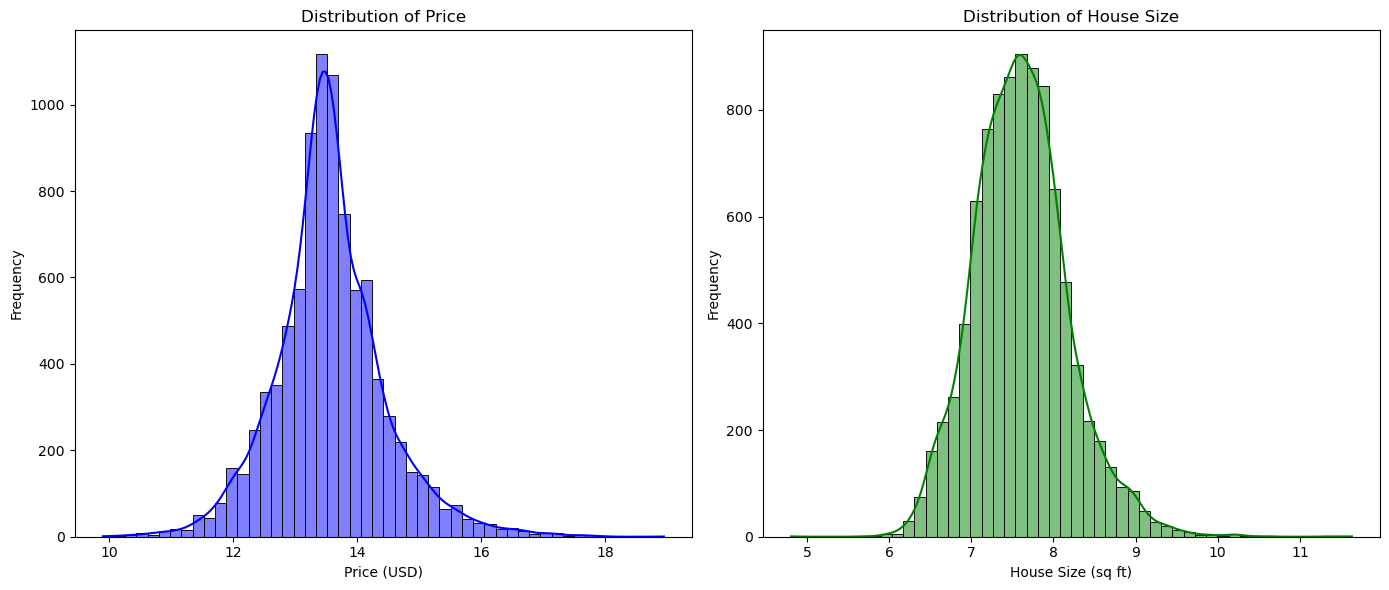

In [28]:
# Distribution of Price and House Size
plt.figure(figsize=(14, 6))

# Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(final_data['log_price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# House Size Distribution
plt.subplot(1, 2, 2)
sns.histplot(final_data['log_house_size'], bins=50, kde=True, color='green')
plt.title('Distribution of House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

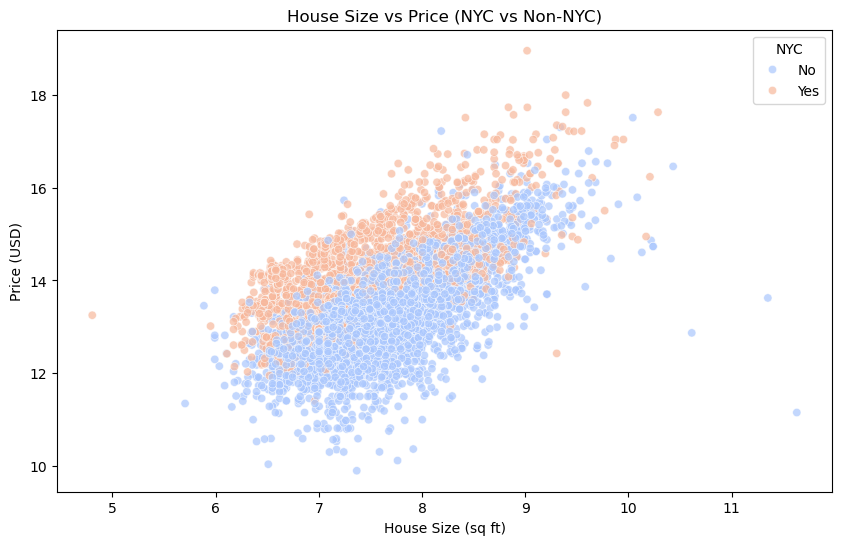

In [29]:
# Relationship Between House Size and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='log_house_size', y='log_price', hue='nyc', alpha=0.7, palette='coolwarm')
plt.title('House Size vs Price (NYC vs Non-NYC)')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price (USD)')
plt.legend(title='NYC')
plt.show()

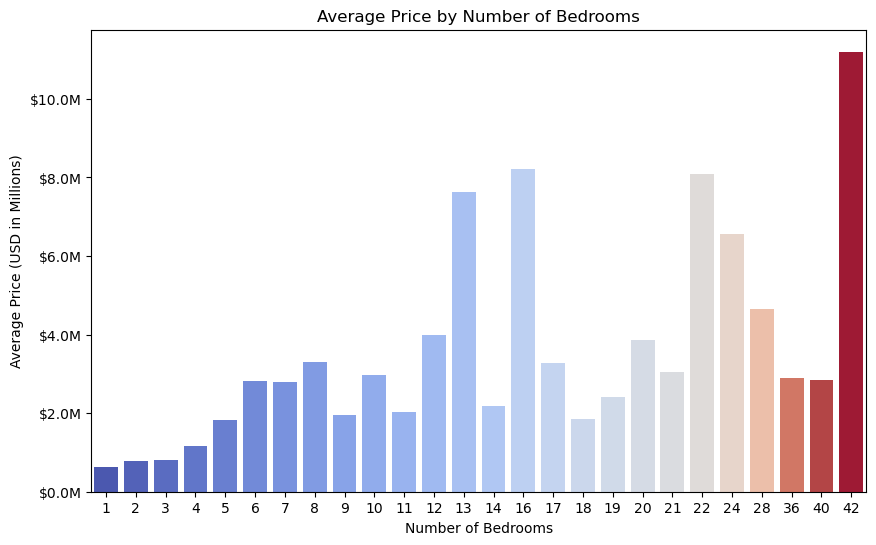

In [30]:
# Group data by number of bedrooms and calculate the average price
avg_price_bedrooms = final_data.groupby('bed')['price'].mean().reset_index()
 
# Plot Average Price by Number of Bedrooms
plt.figure(figsize=(10,6))

sns.barplot(x='bed', y='price', data=avg_price_bedrooms, hue='bed', palette='coolwarm', legend=False)
 
# Adjust y-axis to USD in Millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x / 1e6:.1f}M'))
 
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (USD in Millions)')
plt.show()

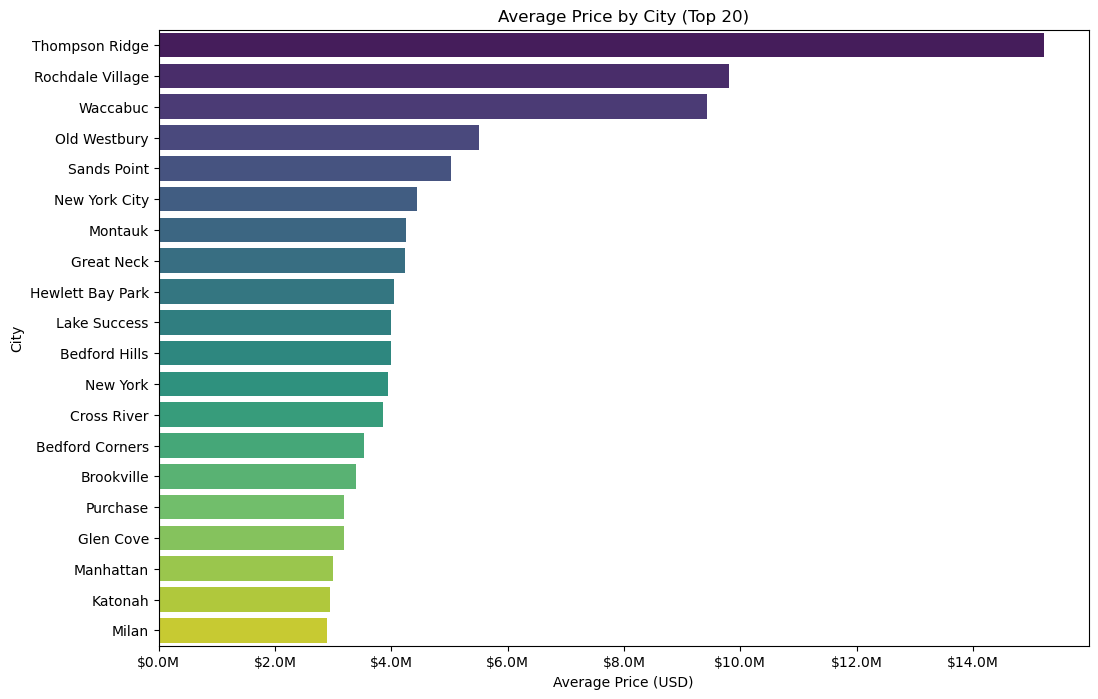

In [31]:
# Calculate average price by city
avg_price_city = final_data.groupby('city')['price'].mean().sort_values(ascending=False).reset_index()
 
# Plot average prices by city
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='city', data=avg_price_city.head(20), hue='city', palette='viridis', legend=False)  # Top 20 cities by price
plt.title('Average Price by City (Top 20)')
plt.xlabel('Average Price (USD)')
plt.ylabel('City')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x / 1e6:.1f}M'))
plt.show()

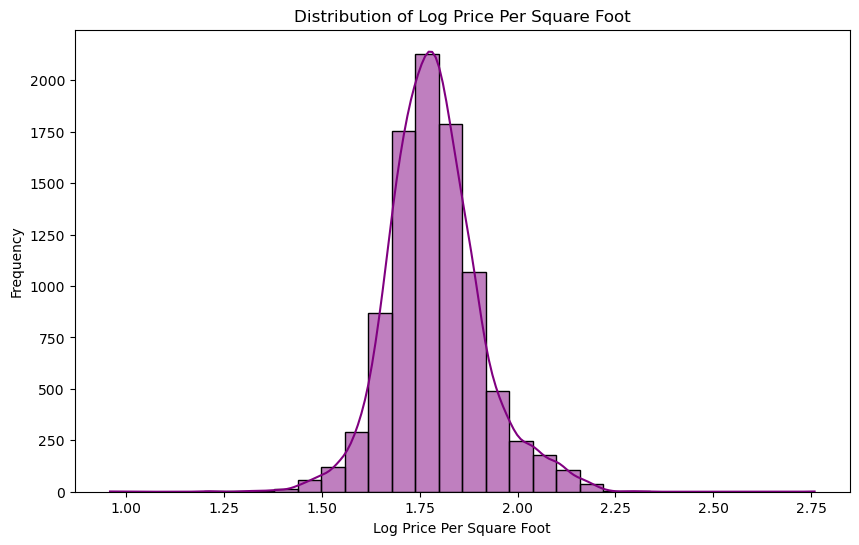

In [32]:
# Calculate log price per square foot
final_data['log_price_per_sqft'] = final_data['log_price'] / final_data['log_house_size']

# Plot distribution of log price per square foot
plt.figure(figsize=(10, 6))
sns.histplot(final_data['log_price_per_sqft'], kde=True, bins=30, color='purple')
plt.title('Distribution of Log Price Per Square Foot')
plt.xlabel('Log Price Per Square Foot')
plt.ylabel('Frequency')
plt.show()


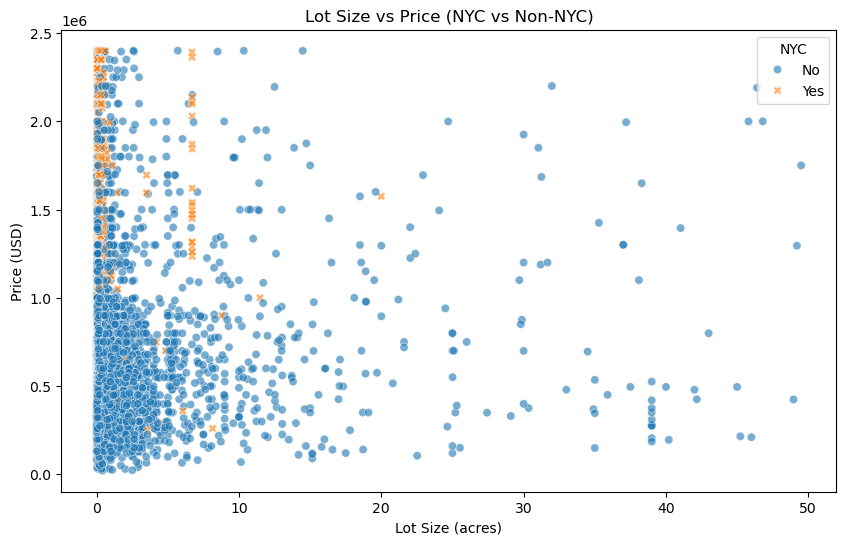

In [33]:
# Exclude outliers based on price using the IQR method
Q1 = final_data['price'].quantile(0.25)
Q3 = final_data['price'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = final_data[(final_data['price'] >= Q1 - 1.5 * IQR) & (final_data['price'] <= Q3 + 1.5 * IQR)]

# Filter out extreme lot sizes for clarity
filtered_data = filtered_data[filtered_data['acre_lot'] < 50]

# Scatter plot of lot size vs price, separated by NYC and Non-NYC
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered_data['acre_lot'], 
    y=filtered_data['price'], 
    hue=filtered_data['nyc'], 
    style=filtered_data['nyc'], 
    alpha=0.6
)
plt.title('Lot Size vs Price (NYC vs Non-NYC)')
plt.xlabel('Lot Size (acres)')
plt.ylabel('Price (USD)')
plt.legend(title='NYC')
plt.show()

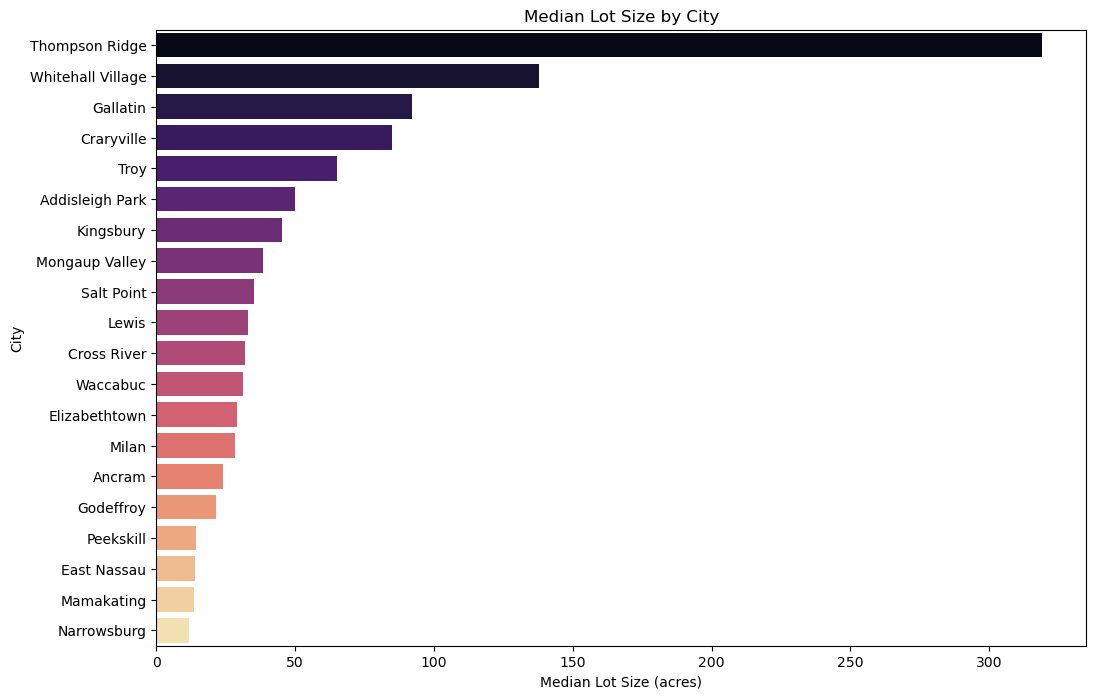

In [34]:
# Calculate median lot size by city
median_lot_size_city = final_data.groupby('city')['acre_lot'].median().sort_values(ascending=False).reset_index()

# Bar plot of median lot size by city
plt.figure(figsize=(12, 8))
sns.barplot(x='acre_lot', y='city', hue='city', data=median_lot_size_city.head(20), palette='magma')
plt.title('Median Lot Size by City')
plt.xlabel('Median Lot Size (acres)')
plt.ylabel('City')
plt.show()

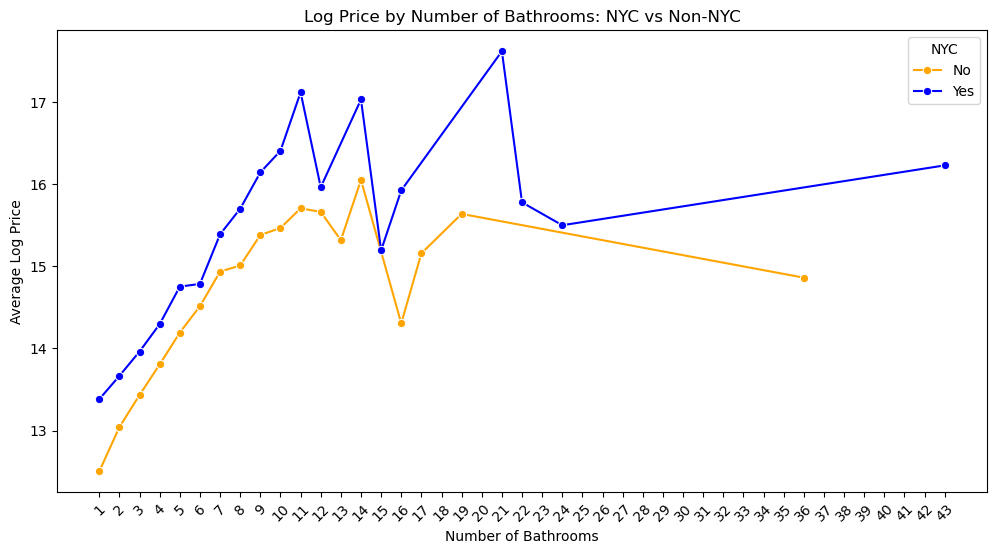

In [35]:
# Ensure the 'bath' column is treated as integers for proper ordering
final_data['bath'] = final_data['bath'].astype(int)

# Group data by bath and NYC status, and calculate the mean log_price
line_data = final_data.groupby(['bath', 'nyc'])['log_price'].mean().reset_index()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='bath',
    y='log_price',
    hue='nyc',
    data=line_data,
    palette={'Yes': 'blue', 'No': 'orange'},
    marker='o'
)

# Titles and labels
plt.title('Log Price by Number of Bathrooms: NYC vs Non-NYC')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Log Price')

# Adjust x-axis to display integers only
plt.xticks(ticks=range(final_data['bath'].min(), final_data['bath'].max() + 1), rotation=45)

plt.legend(title='NYC')
plt.show()


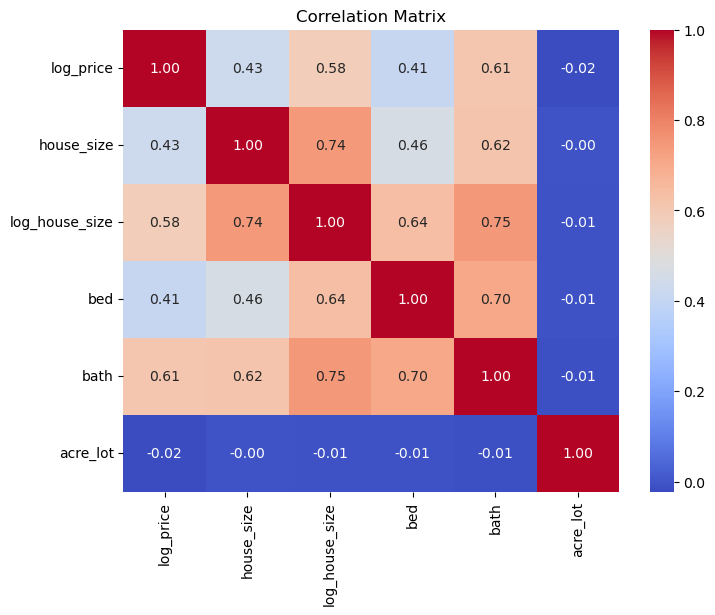

In [36]:
# Correlation Heatmap
corr_matrix = final_data[['log_price', 'house_size', 'log_house_size', 'bed', 'bath', 'acre_lot']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Q2:

In [38]:
#look at this, acre_lot has very low correlation to log_price ---- remove it out! 
#so now we have 4 independent variables: bed, bath, log_house_size, nyc
# bed negative not make sense---- not works even high rsquare and all variables significant ----> try interaction term

In [39]:
# change 'nyc' to numeric, yes=1 and no=0
final_data["nyc"] = final_data["nyc"].astype(str)
final_data["nyc"] = final_data["nyc"].replace({"Yes": 1, "No": 0}).astype(int)  

/var/folders/8y/y1s8hdpd6xjf4t767sc8j_g00000gn/T/ipykernel_10479/3606787547.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data["nyc"] = final_data["nyc"].replace({"Yes": 1, "No": 0}).astype(int)


In [40]:
# Define features and target variable'
X = final_data[['bed', 'bath', 'log_house_size', 'nyc']]  
y = final_data['log_price']  

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for OLS model
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Train the OLS Regression Model
model = sm.OLS(y_train, X_train_const).fit()

# Print OLS Summary
print("OLS Regression Summary:")
print(model.summary())

OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     2133.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:54:49   Log-Likelihood:                -6699.5
No. Observations:                7328   AIC:                         1.341e+04
Df Residuals:                    7323   BIC:                         1.344e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7

In [41]:
# Predict using the model
y_pred = model.predict(X_test_const)

# Evaluate the Model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("\nLinear Regression Metrics:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


Linear Regression Metrics:
RMSE: 0.5931311014465437
MAE: 0.45991461683768653


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
# Predict using the model
y_pred = model.predict(X_test_const)
print(y_pred)

2215    13.832844
8533    13.584652
2373    13.487527
1527    13.974547
4522    14.663983
          ...    
5529    12.345169
9044    13.330081
6859    13.225715
1536    14.197933
745     13.722055
Length: 1833, dtype: float64


In [43]:
def get_formula():
    # Base formula
    model_formula = 'log_price ~ bed + bath + log_house_size + nyc'
    return model_formula
    
model_formula = get_formula()
model = smf.ols(formula=model_formula, data=final_data).fit()

# Print the formula and summary
print("Model Formula:")
print(model_formula)
print("\nModel Summary:")
print(model.summary())

Model Formula:
log_price ~ bed + bath + log_house_size + nyc

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     2703.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:54:49   Log-Likelihood:                -8341.8
No. Observations:                9161   AIC:                         1.669e+04
Df Residuals:                    9156   BIC:                         1.673e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [44]:
def get_formula():
    # Base formula
    model_formula = 'log_price ~ bed + bath + log_house_size + nyc'
    
    # Add interaction terms based on correlation analysis
    interaction_terms = [
        'bed:bath',
        'bath:log_house_size',
        'bed:log_house_size'
    ]
    for term in interaction_terms:
        model_formula += f' + {term}'
    
    return model_formula

# Generate formula and fit the model
model_formula = get_formula()
model = smf.ols(formula=model_formula, data=final_data).fit()

# Print the formula and summary
print("Model Formula:")
print(model_formula)
print("\nModel Summary:")
print(model.summary())

Model Formula:
log_price ~ bed + bath + log_house_size + nyc + bed:bath + bath:log_house_size + bed:log_house_size

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1644.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:54:49   Log-Likelihood:                -8183.5
No. Observations:                9161   AIC:                         1.638e+04
Df Residuals:                    9153   BIC:                         1.644e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025    

In [45]:
#bath has high correlation with others so make it interaction term! 
#creating regression model with interaction terms
def get_formula():
    # Base formula
    model_formula = 'log_price ~ bed + bath + log_house_size + nyc'
    
    # Add interaction terms based on correlation analysis
    interaction_terms = [
        'bed:log_house_size'
    ]
    for term in interaction_terms:
        model_formula += f' + {term}'
    
    return model_formula

# Generate formula and fit the model
model_formula = get_formula()
model = smf.ols(formula=model_formula, data=final_data).fit()

# Print the formula and summary
print("Model Formula:")
print(model_formula)
print("\nModel Summary:")
print(model.summary())

Model Formula:
log_price ~ bed + bath + log_house_size + nyc + bed:log_house_size

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     2212.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:54:49   Log-Likelihood:                -8284.4
No. Observations:                9161   AIC:                         1.658e+04
Df Residuals:                    9155   BIC:                         1.662e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [46]:
# creating degree 2 polynomial regression 
def get_formula(degree):
    model_formula='log_price ~ bed + bath + log_house_size + nyc'
    for i in range(1,degree):
        model_formula+= '+I(bed**'+str(i+1)+')'+'+I(bath**'+str(i+1)+')'+'+I(log_house_size**'+str(i+1)+')'
    return model_formula

model_formula = get_formula(degree=2)

model = smf.ols(formula=model_formula, data=final_data).fit()

# Print formula and summary
print("Model Formula:")
print(model_formula)
print("\nModel Summary:")
print(model.summary())

Model Formula:
log_price ~ bed + bath + log_house_size + nyc+I(bed**2)+I(bath**2)+I(log_house_size**2)

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1636.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:54:49   Log-Likelihood:                -8196.0
No. Observations:                9161   AIC:                         1.641e+04
Df Residuals:                    9153   BIC:                         1.647e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]


Model Formula:
log_price ~ bed + bath + log_house_size + nyc+I(bed**2)+I(bath**2)+I(log_house_size**2)+I(bed**3)+I(bath**3)+I(log_house_size**3)

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1176.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:54:49   Log-Likelihood:                -8126.9
No. Observations:                9161   AIC:                         1.628e+04
Df Residuals:                    9150   BIC:                         1.635e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err     

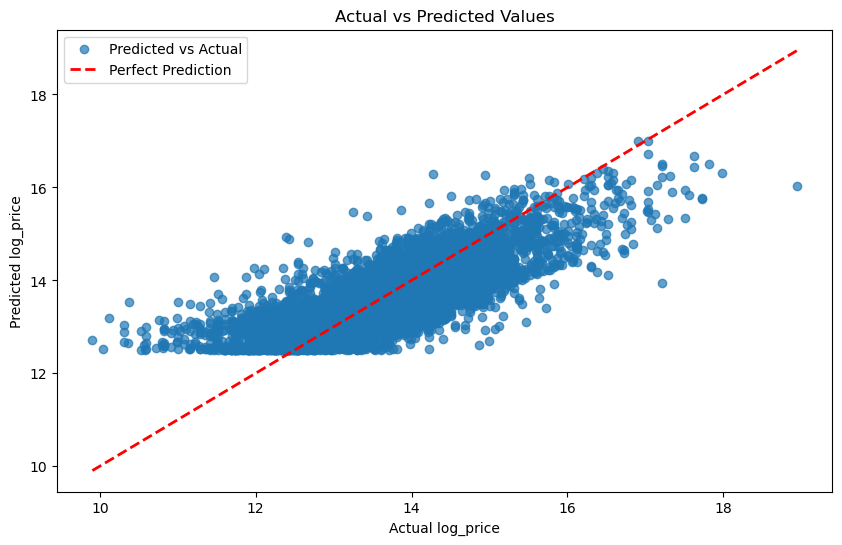

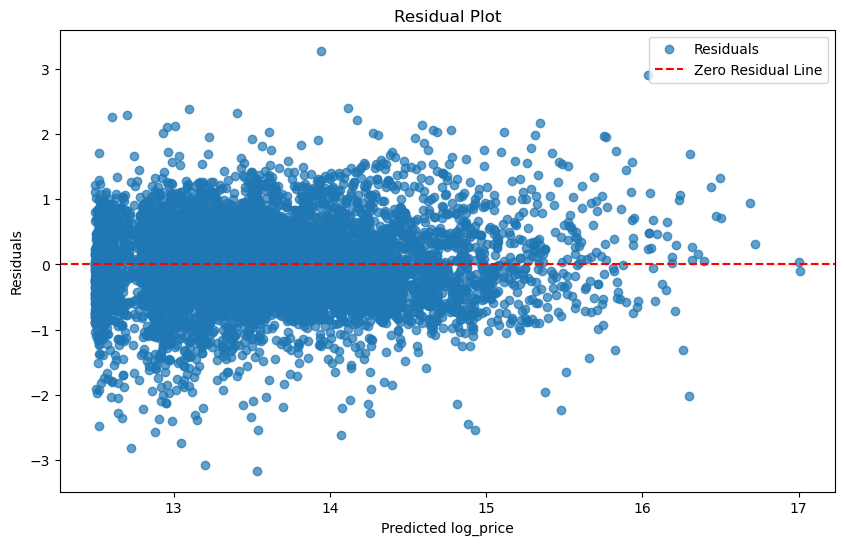

In [47]:
# creating degree 3 polynomial regression 
model_formula = get_formula(degree=3)

model = smf.ols(formula=model_formula, data=final_data).fit()

# Print formula and summary
print("Model Formula:")
print(model_formula)
print("\nModel Summary:")
print(model.summary())

# Generate predictions and residuals
final_data['Prediction'] = model.predict(final_data)
final_data['Residual'] = final_data['log_price'] - final_data['Prediction']

# Calculate MAE and MSE
mae = mean_absolute_error(final_data['log_price'], final_data['Prediction'])
mse = mean_squared_error(final_data['log_price'], final_data['Prediction'])

# Print the formula, summary, and error metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(final_data['log_price'], final_data['Prediction'], alpha=0.7, label='Predicted vs Actual')
plt.plot([final_data['log_price'].min(), final_data['log_price'].max()], 
         [final_data['log_price'].min(), final_data['log_price'].max()], 
         '--r', linewidth=2, label='Perfect Prediction')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(final_data['Prediction'], final_data['Residual'], alpha=0.7, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title("Residual Plot")
plt.xlabel("Predicted log_price")
plt.ylabel("Residuals")
plt.legend()
plt.show()


Q3:

Model Performance Comparison

In [50]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                           make_scorer, accuracy_score, precision_score, recall_score, f1_score)

# Set random seeds for reproducibility
import random
np.random.seed(42)
random.seed(42)

In [51]:
# 1. Data Loading and Initial Preprocessing
def load_and_preprocess_data(file_path):
    """Load and preprocess the dataset"""
    data = pd.read_csv(file_path, low_memory=False)
    
    # Convert critical columns to numeric
    critical_columns = ['price', 'bed', 'bath', 'house_size', 'acre_lot']
    for col in critical_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # Remove rows with missing values in critical columns
    data = data.dropna(subset=critical_columns)
    
    # Drop duplicates
    data = data.drop_duplicates()
    
    # Create basic log transformations
    data['log_price'] = np.log(data['price'])
    data['log_house_size'] = np.log(data['house_size'])
    data['log_acre_lot'] = np.log(data['acre_lot'] + 1)
    
    return data

In [52]:
# 2. Feature Engineering
def create_features(df):
    """Create engineered features"""
    features = df.copy()
    
    # Price per square foot
    features['price_per_sqft'] = features['price'] / features['house_size']
    features['log_price_per_sqft'] = np.log(features['price_per_sqft'])
    
    # Total property size
    features['total_property_size'] = features['house_size'] + (features['acre_lot'] * 43560)
    features['log_total_property_size'] = np.log(features['total_property_size'])
    features['house_to_property_ratio'] = features['house_size'] / features['total_property_size']
    
    # Room-related features
    features['rooms_per_sqft'] = (features['bed'] + features['bath']) / features['house_size']
    features['bed_bath_ratio'] = features['bed'] / features['bath']
    
    # Binary indicators
    features['high_price'] = (features['price'] > features['price'].median()).astype(int)
    features['large_house'] = (features['house_size'] > features['house_size'].median()).astype(int)
    features['large_lot'] = (features['acre_lot'] > features['acre_lot'].median()).astype(int)
    
    return features

In [53]:
# 3. Model Training and Evaluation
def train_and_evaluate_models(X_train, X_val, y_train, y_val, feature_set_name):
    """Train and evaluate multiple models with detailed metrics"""
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }
    
    param_grids = {
        'Logistic Regression': {
            'C': [0.1, 1.0, 10.0],
            'class_weight': [None, 'balanced']
        },
        'Decision Tree': {
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': [None, 'balanced']
        },
        'Random Forest': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': [None, 'balanced']
        }
    }
    
    results = {}
    
    for model_name, model in models.items():
        print(f"\n{'-'*50}")
        print(f"Training {model_name} with {feature_set_name} features")
        print(f"{'-'*50}")
        
        # GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            cv=5,
            scoring=['accuracy', 'precision', 'recall', 'f1'],
            refit='f1',
            n_jobs=-1,
            verbose=1,
            return_train_score=True
        )
        
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        # Calculate metrics
        y_train_pred = best_model.predict(X_train)
        y_val_pred = best_model.predict(X_val)
        
        train_metrics = {
            'accuracy': accuracy_score(y_train, y_train_pred),
            'precision': precision_score(y_train, y_train_pred),
            'recall': recall_score(y_train, y_train_pred),
            'f1': f1_score(y_train, y_train_pred)
        }
        
        val_metrics = {
            'accuracy': accuracy_score(y_val, y_val_pred),
            'precision': precision_score(y_val, y_val_pred),
            'recall': recall_score(y_val, y_val_pred),
            'f1': f1_score(y_val, y_val_pred)
        }
        
        # Print results
        print("\nBest Parameters:", grid_search.best_params_)
        print("\nTraining Metrics:")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value:.3f}")
        
        print("\nValidation Metrics:")
        for metric, value in val_metrics.items():
            print(f"{metric}: {value:.3f}")
        
        # Plot confusion matrices
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        sns.heatmap(confusion_matrix(y_train, y_train_pred), 
                   annot=True, fmt='d', ax=ax1, cmap='Blues')
        ax1.set_title(f'{model_name} - Training Confusion Matrix')
        ax1.set_ylabel('True Label')
        ax1.set_xlabel('Predicted Label')
        
        sns.heatmap(confusion_matrix(y_val, y_val_pred), 
                   annot=True, fmt='d', ax=ax2, cmap='Blues')
        ax2.set_title(f'{model_name} - Validation Confusion Matrix')
        ax2.set_ylabel('True Label')
        ax2.set_xlabel('Predicted Label')
        
        plt.tight_layout()
        plt.show()
        
        # Feature importance for tree-based models
        if model_name in ['Random Forest', 'Decision Tree']:
            plt.figure(figsize=(10, 6))
            importances = pd.DataFrame({
                'feature': features,
                'importance': best_model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            plt.bar(range(len(importances)), importances['importance'])
            plt.xticks(range(len(importances)), importances['feature'], rotation=45)
            plt.title(f'{model_name} - Feature Importance')
            plt.tight_layout()
            plt.show()
        
        results[model_name] = {
            'model': best_model,
            'train_metrics': train_metrics,
            'val_metrics': val_metrics,
            'best_params': grid_search.best_params_
        }
    
    return results


Evaluating feature set: basic

--------------------------------------------------
Training Logistic Regression with basic features
--------------------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Parameters: {'C': 10.0, 'class_weight': 'balanced'}

Training Metrics:
accuracy: 0.722
precision: 0.561
recall: 0.711
f1: 0.627

Validation Metrics:
accuracy: 0.711
precision: 0.558
recall: 0.708
f1: 0.624


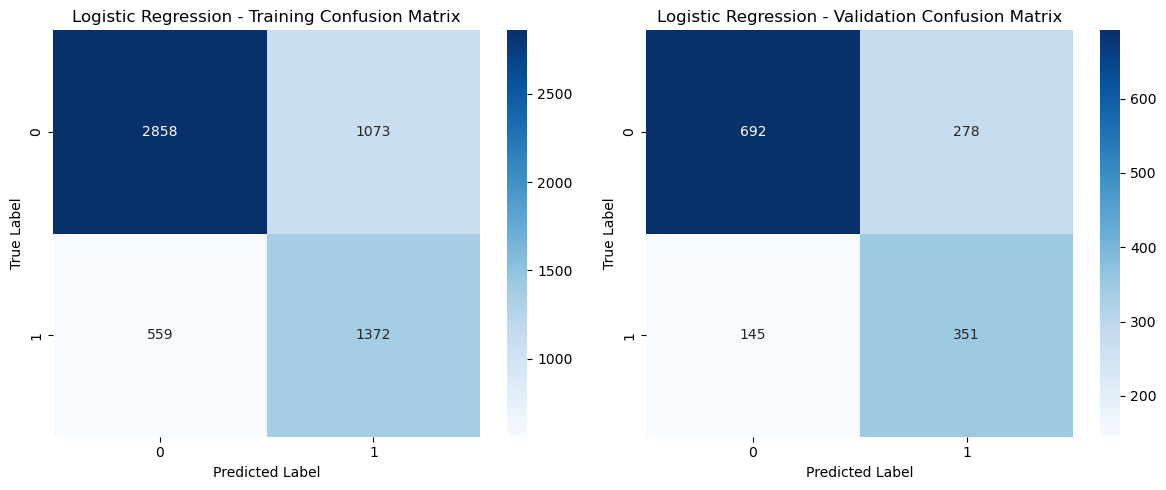


--------------------------------------------------
Training Decision Tree with basic features
--------------------------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}

Training Metrics:
accuracy: 0.728
precision: 0.556
recall: 0.869
f1: 0.678

Validation Metrics:
accuracy: 0.689
precision: 0.525
recall: 0.837
f1: 0.645


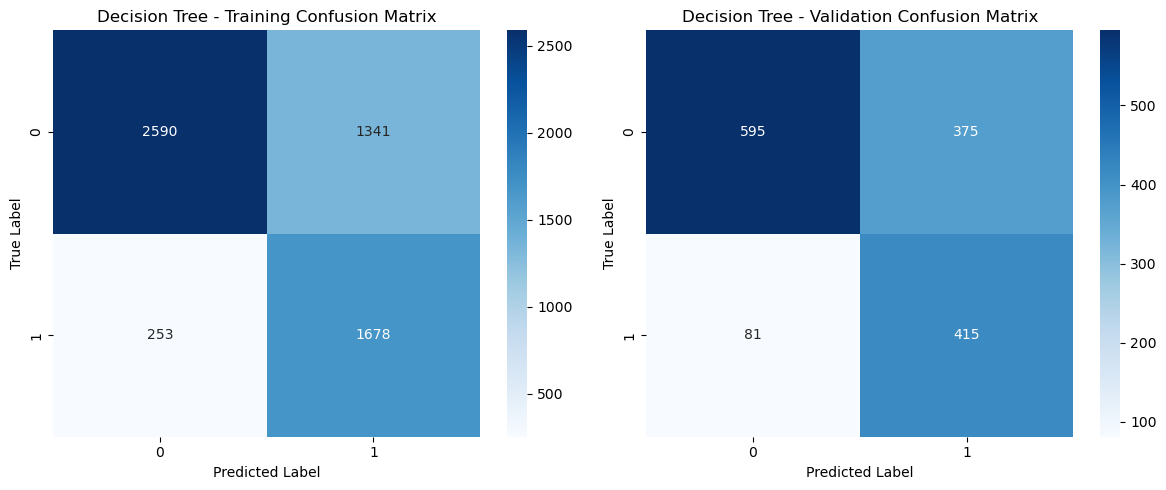

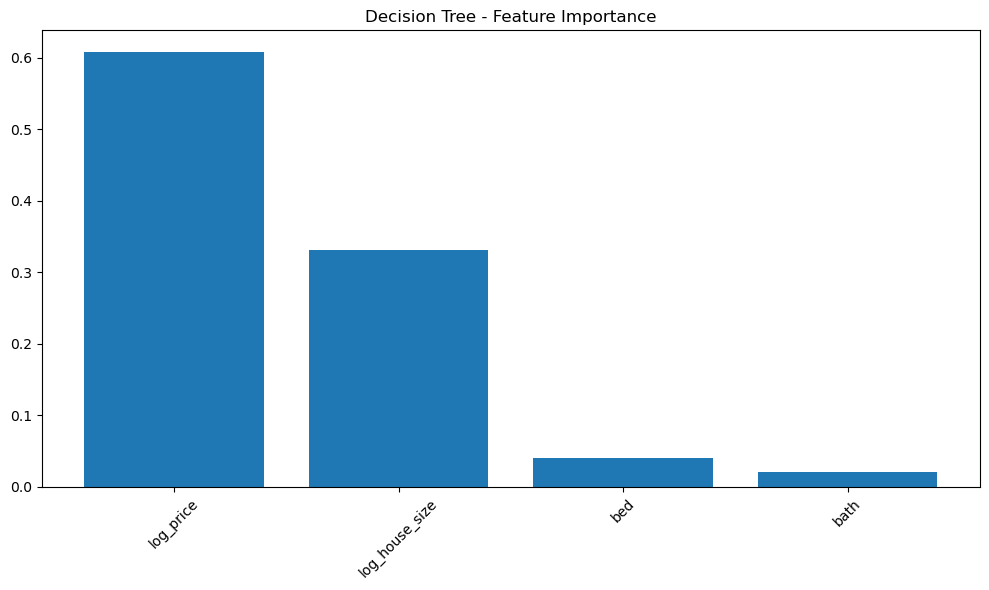


--------------------------------------------------
Training Random Forest with basic features
--------------------------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Training Metrics:
accuracy: 0.809
precision: 0.661
recall: 0.863
f1: 0.749

Validation Metrics:
accuracy: 0.749
precision: 0.597
recall: 0.792
f1: 0.681


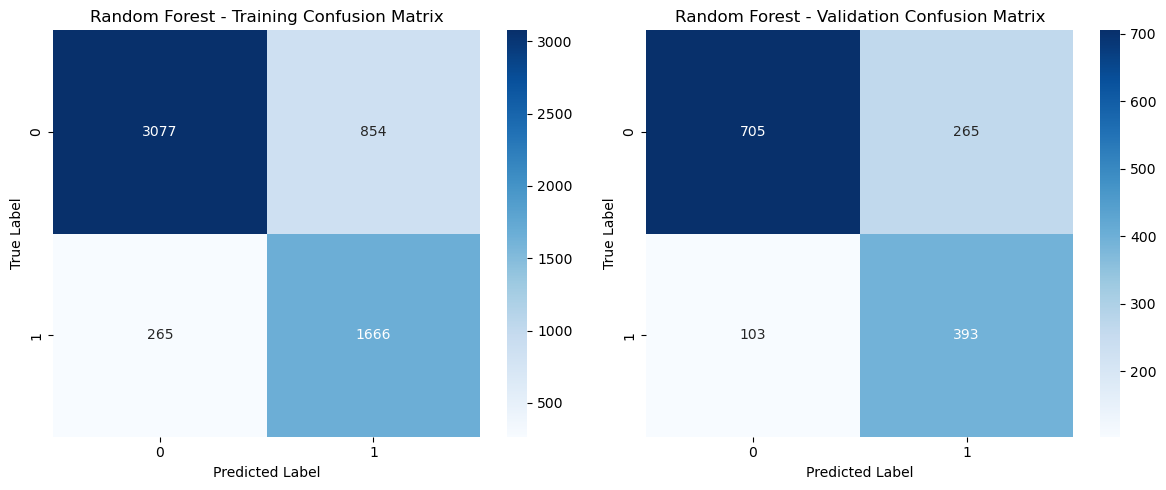

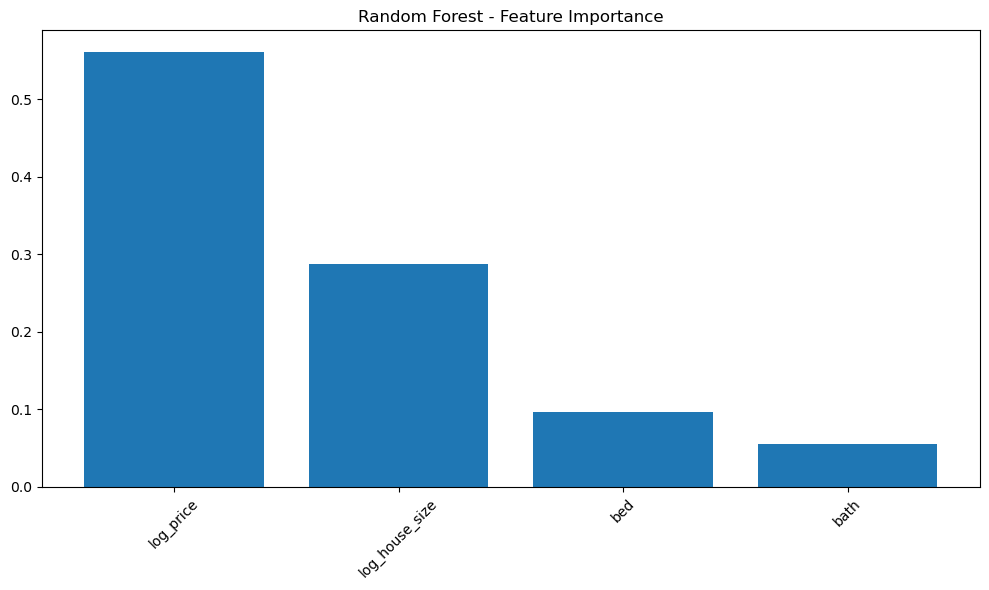


Test Set Evaluation:
--------------------------------------------------

Logistic Regression Test Results:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1204
           1       0.58      0.71      0.64       629

    accuracy                           0.72      1833
   macro avg       0.70      0.72      0.71      1833
weighted avg       0.74      0.72      0.73      1833



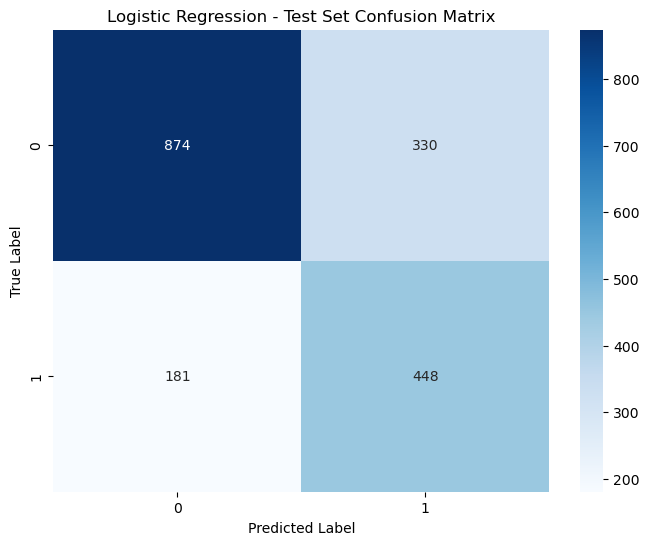


Decision Tree Test Results:
              precision    recall  f1-score   support

           0       0.86      0.64      0.74      1204
           1       0.54      0.81      0.65       629

    accuracy                           0.70      1833
   macro avg       0.70      0.72      0.69      1833
weighted avg       0.75      0.70      0.71      1833



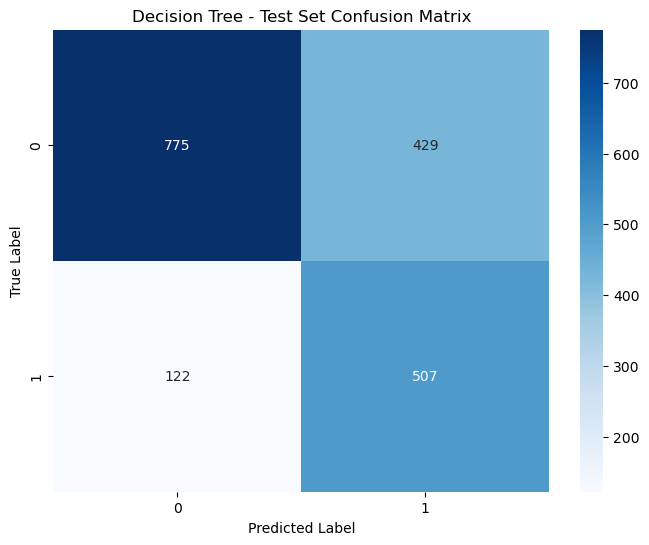


Random Forest Test Results:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1204
           1       0.61      0.76      0.67       629

    accuracy                           0.75      1833
   macro avg       0.73      0.75      0.73      1833
weighted avg       0.77      0.75      0.75      1833



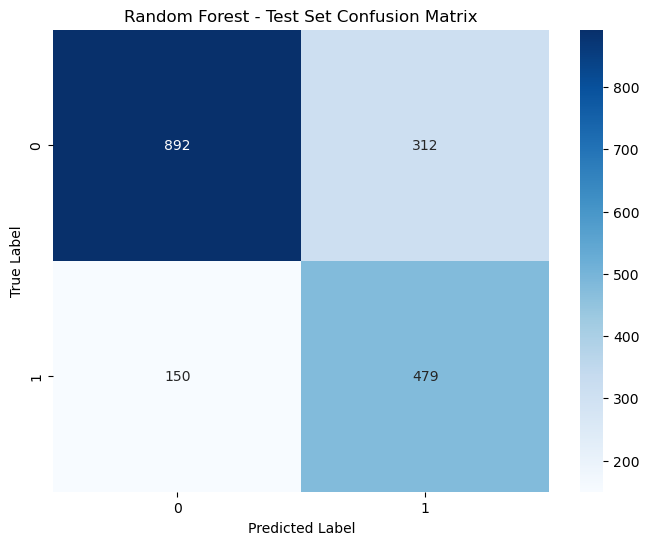


Evaluating feature set: property

--------------------------------------------------
Training Logistic Regression with property features
--------------------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Parameters: {'C': 10.0, 'class_weight': 'balanced'}

Training Metrics:
accuracy: 0.774
precision: 0.615
recall: 0.839
f1: 0.710

Validation Metrics:
accuracy: 0.785
precision: 0.635
recall: 0.859
f1: 0.730


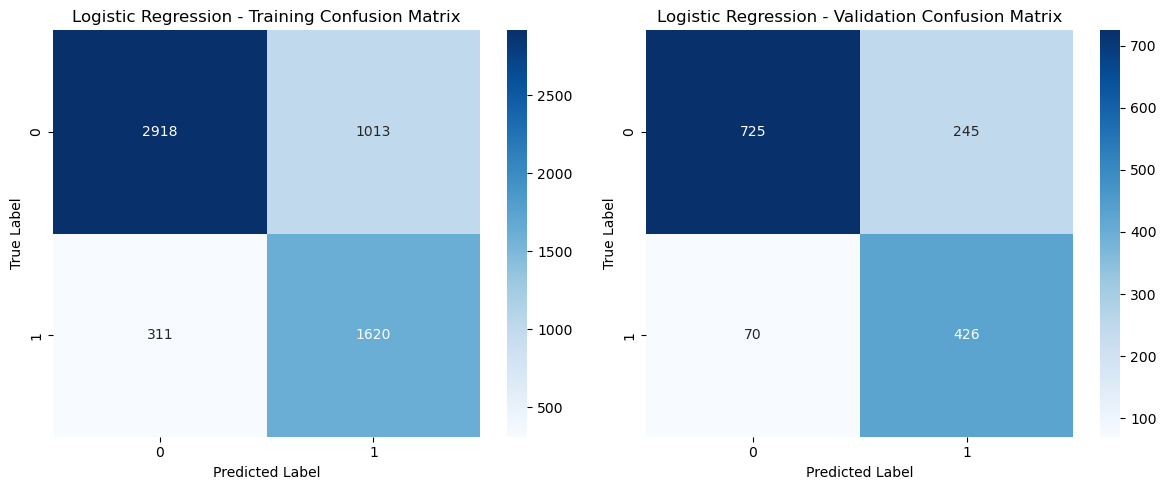


--------------------------------------------------
Training Decision Tree with property features
--------------------------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}

Training Metrics:
accuracy: 0.808
precision: 0.648
recall: 0.914
f1: 0.758

Validation Metrics:
accuracy: 0.780
precision: 0.627
recall: 0.867
f1: 0.728


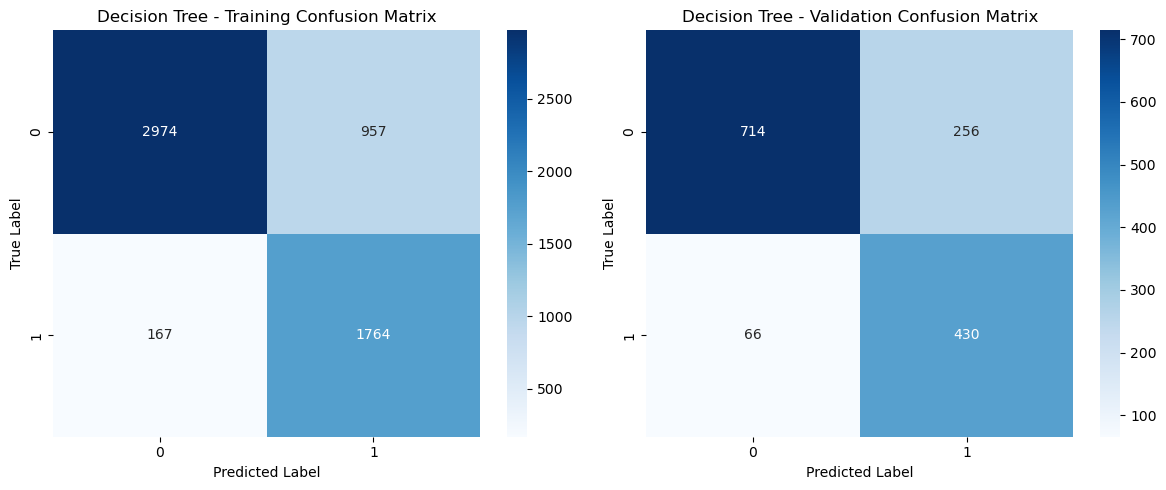

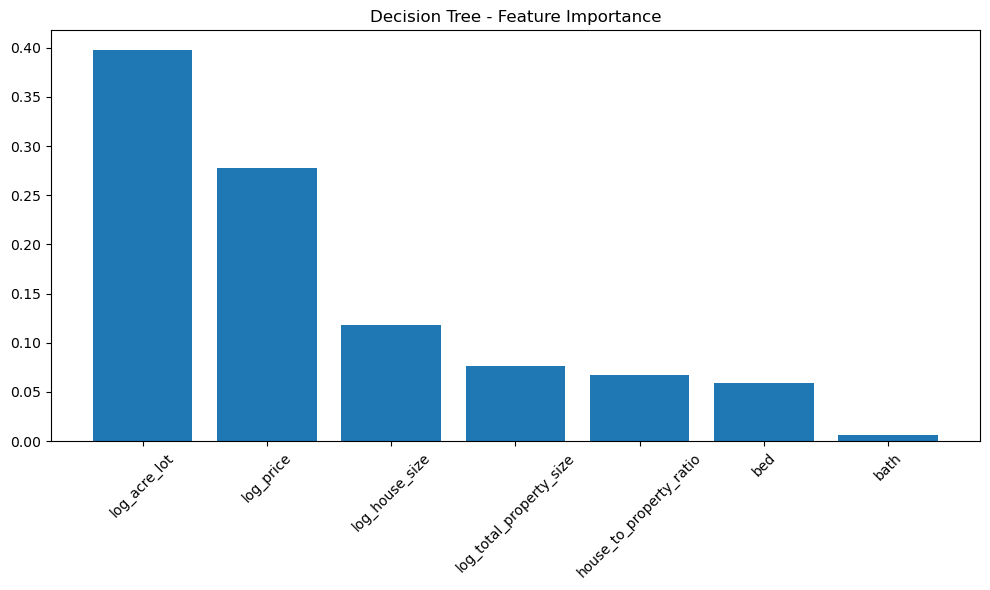


--------------------------------------------------
Training Random Forest with property features
--------------------------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Training Metrics:
accuracy: 0.852
precision: 0.703
recall: 0.953
f1: 0.809

Validation Metrics:
accuracy: 0.799
precision: 0.650
recall: 0.881
f1: 0.748


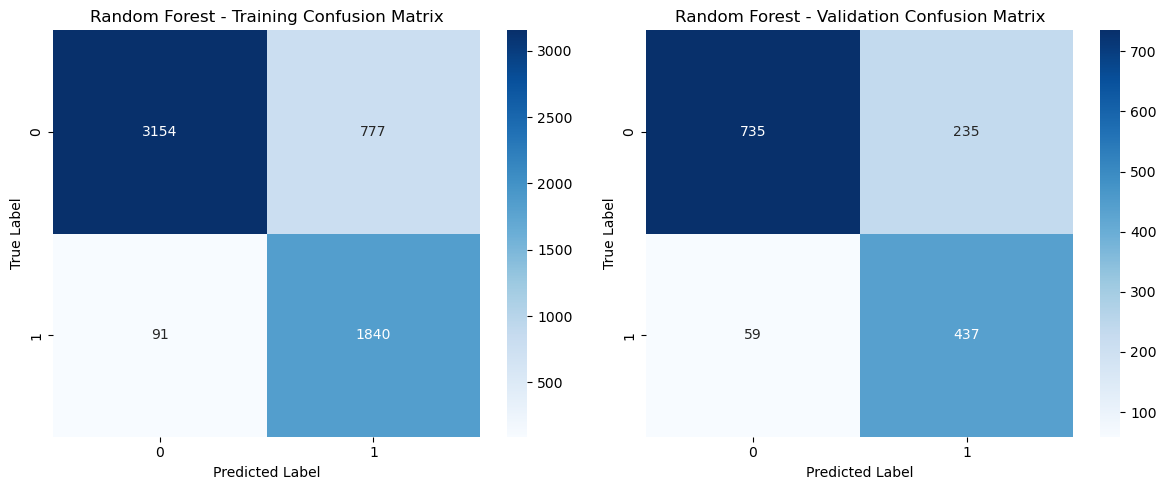

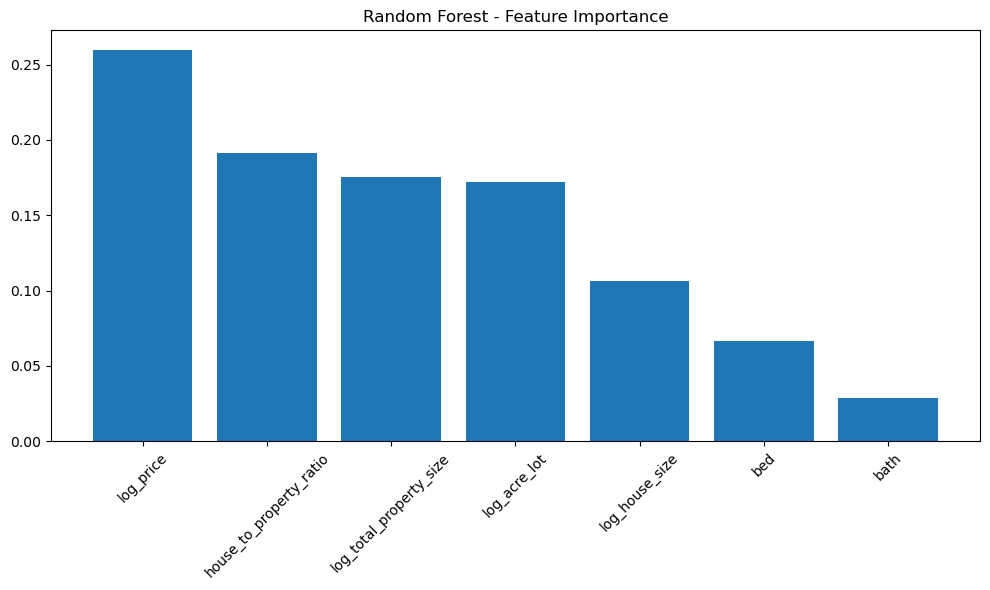


Test Set Evaluation:
--------------------------------------------------

Logistic Regression Test Results:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1204
           1       0.62      0.85      0.72       629

    accuracy                           0.77      1833
   macro avg       0.76      0.79      0.76      1833
weighted avg       0.81      0.77      0.78      1833



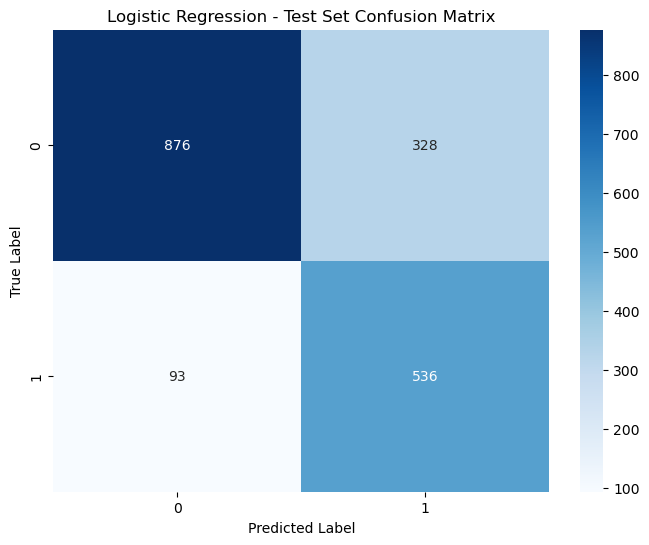


Decision Tree Test Results:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1204
           1       0.62      0.87      0.73       629

    accuracy                           0.77      1833
   macro avg       0.77      0.80      0.77      1833
weighted avg       0.82      0.77      0.78      1833



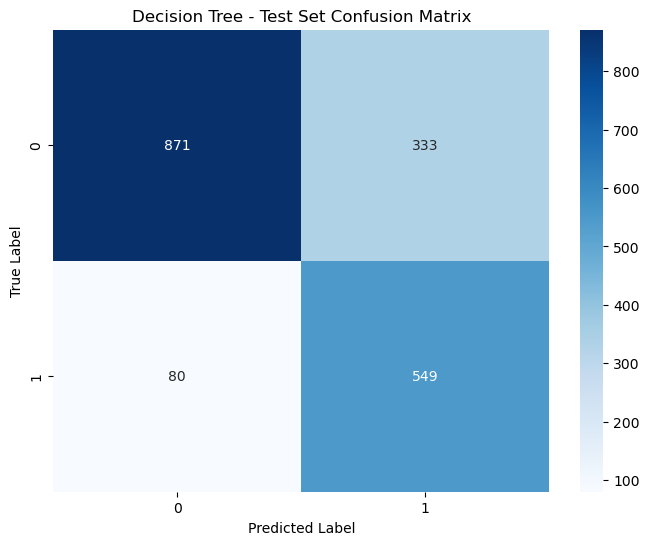


Random Forest Test Results:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1204
           1       0.65      0.89      0.75       629

    accuracy                           0.80      1833
   macro avg       0.79      0.82      0.79      1833
weighted avg       0.83      0.80      0.80      1833



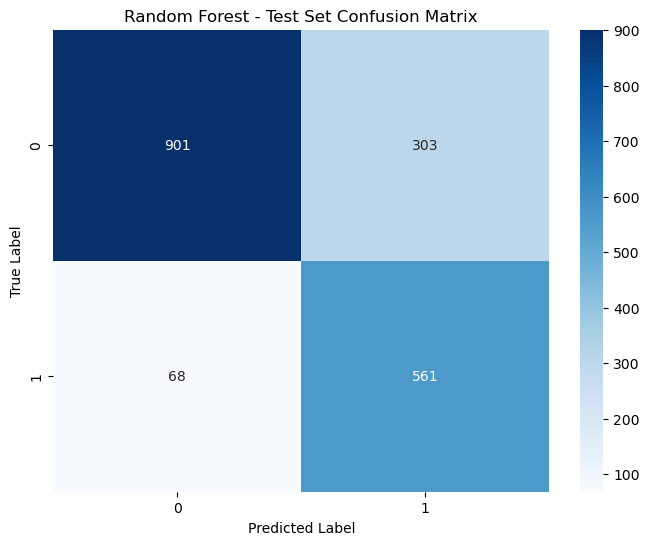


Evaluating feature set: all

--------------------------------------------------
Training Logistic Regression with all features
--------------------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Parameters: {'C': 10.0, 'class_weight': 'balanced'}

Training Metrics:
accuracy: 0.774
precision: 0.614
recall: 0.847
f1: 0.712

Validation Metrics:
accuracy: 0.792
precision: 0.641
recall: 0.875
f1: 0.740


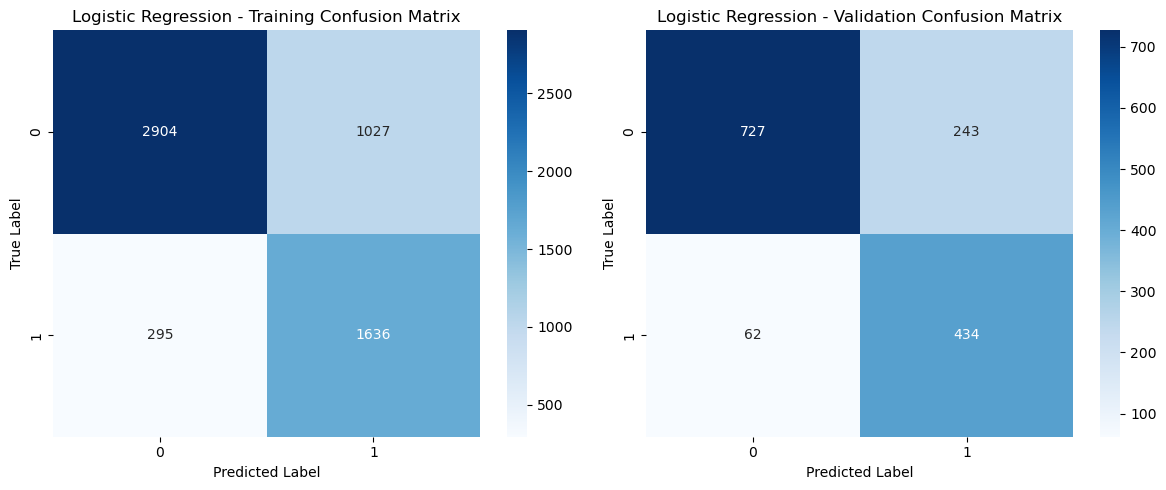


--------------------------------------------------
Training Decision Tree with all features
--------------------------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training Metrics:
accuracy: 0.771
precision: 0.598
recall: 0.936
f1: 0.729

Validation Metrics:
accuracy: 0.758
precision: 0.590
recall: 0.933
f1: 0.723


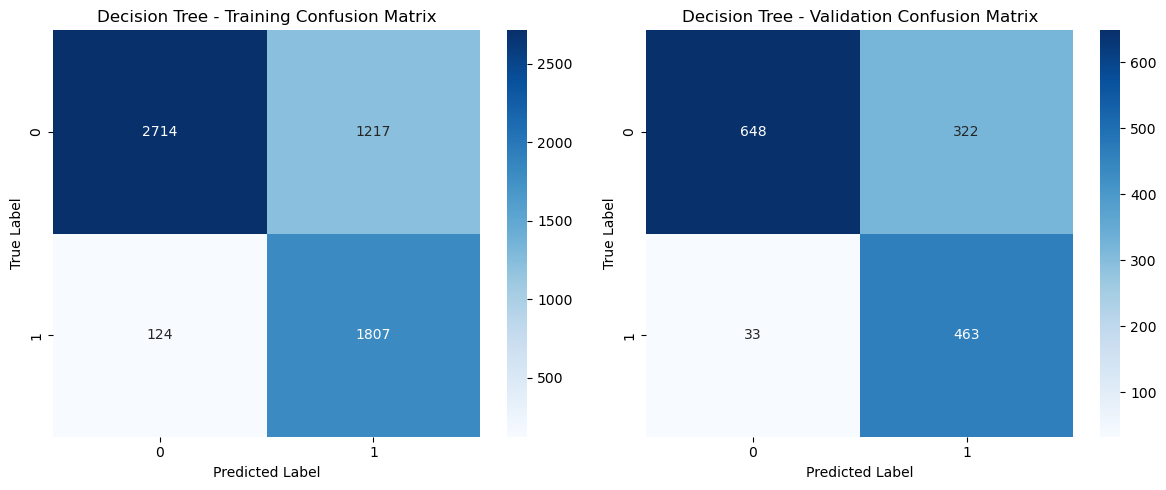

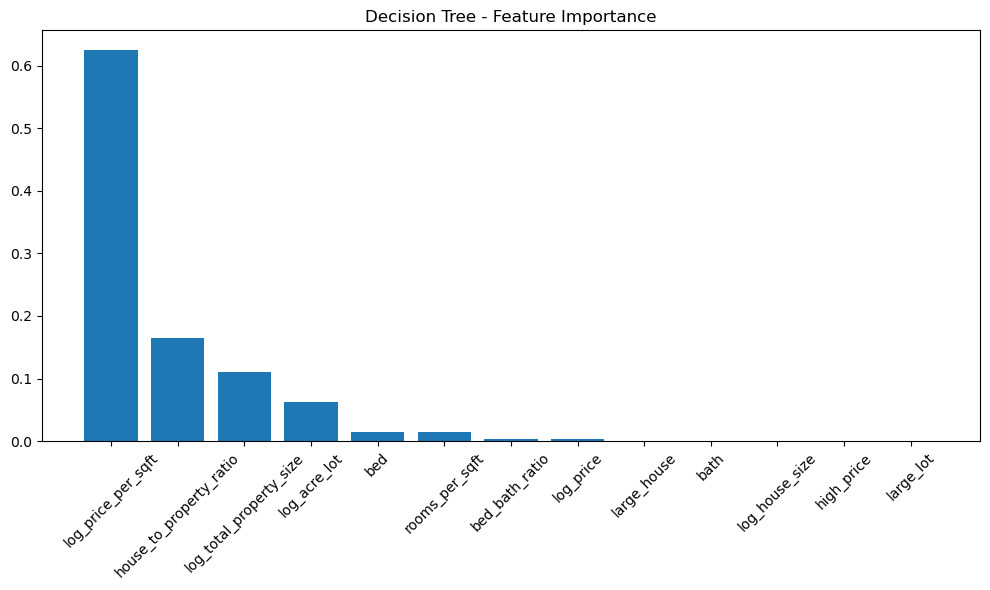


--------------------------------------------------
Training Random Forest with all features
--------------------------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Training Metrics:
accuracy: 0.860
precision: 0.714
recall: 0.957
f1: 0.818

Validation Metrics:
accuracy: 0.810
precision: 0.662
recall: 0.897
f1: 0.762


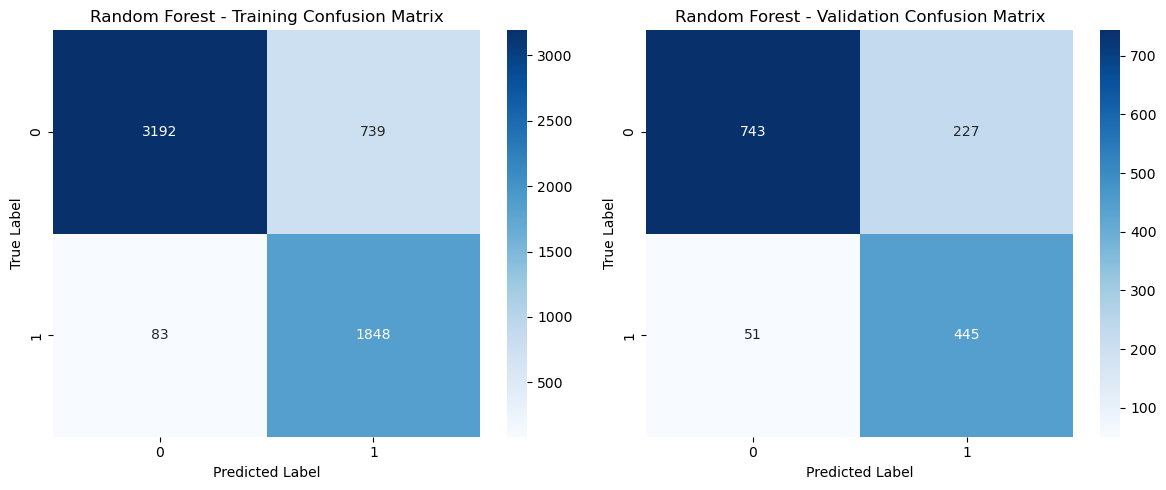

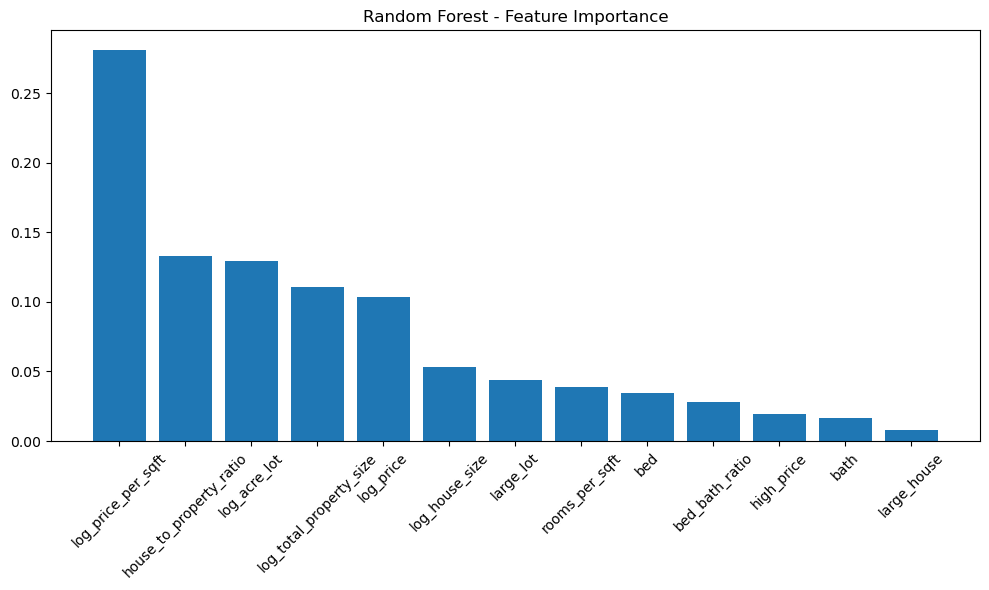


Test Set Evaluation:
--------------------------------------------------

Logistic Regression Test Results:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1204
           1       0.62      0.87      0.73       629

    accuracy                           0.78      1833
   macro avg       0.77      0.80      0.77      1833
weighted avg       0.82      0.78      0.78      1833



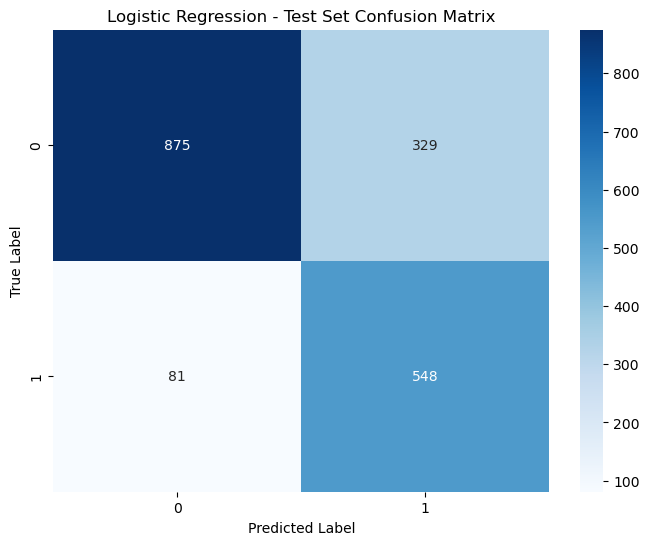


Decision Tree Test Results:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1204
           1       0.60      0.93      0.73       629

    accuracy                           0.77      1833
   macro avg       0.78      0.81      0.76      1833
weighted avg       0.83      0.77      0.77      1833



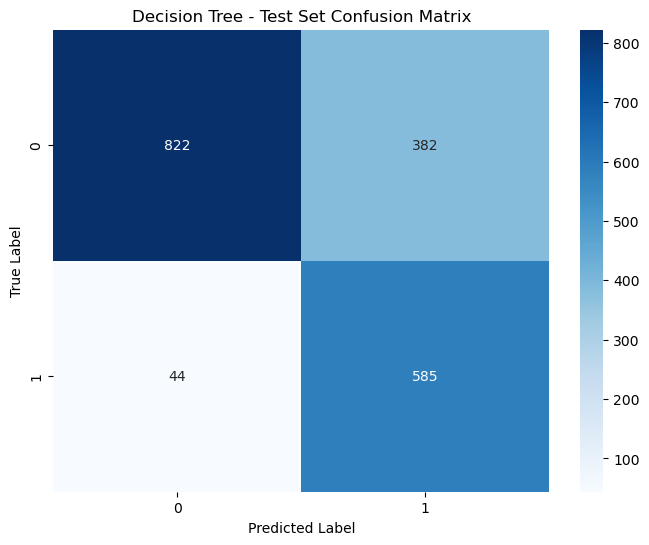


Random Forest Test Results:
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1204
           1       0.66      0.89      0.76       629

    accuracy                           0.80      1833
   macro avg       0.79      0.82      0.79      1833
weighted avg       0.84      0.80      0.81      1833



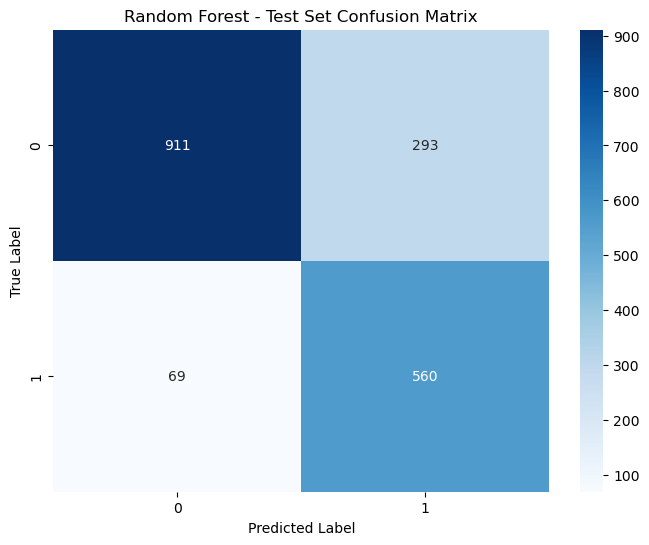


Final Model Comparison (Including Test Results):

Feature set: basic
--------------------------------------------------

Logistic Regression:
Best parameters: {'C': 10.0, 'class_weight': 'balanced'}
Training metrics: {'accuracy': 0.721596724667349, 'precision': 0.5611451942740286, 'recall': 0.7105126877265665, 'f1': 0.6270566727605119}
Validation metrics: {'accuracy': 0.7114597544338336, 'precision': 0.5580286168521462, 'recall': 0.7076612903225806, 'f1': 0.624}
Test metrics: {'accuracy': 0.7212220403709766, 'precision': 0.5758354755784062, 'recall': 0.712241653418124, 'f1': 0.6368159203980099}

Decision Tree:
Best parameters: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Training metrics: {'accuracy': 0.7280791538723985, 'precision': 0.5558131831732361, 'recall': 0.8689798032107716, 'f1': 0.677979797979798}
Validation metrics: {'accuracy': 0.6889495225102319, 'precision': 0.5253164556962026, 'recall': 0.8366935483870968, 'f1': 0.64541213

In [54]:
# Main execution
# Load and preprocess data
file_path = 'data/realtor-data-ny.csv'
data = load_and_preprocess_data(file_path)
features_df = create_features(data)

# Define feature sets
feature_sets = {
    'basic': ['bed', 'bath', 'log_house_size', 'log_price'],
    'property': ['bed', 'bath', 'log_house_size', 'log_price', 'log_acre_lot', 
                'house_to_property_ratio', 'log_total_property_size'],
    'all': ['bed', 'bath', 'log_house_size', 'log_price', 'log_acre_lot',
            'house_to_property_ratio', 'log_total_property_size',
            'log_price_per_sqft', 'rooms_per_sqft', 'bed_bath_ratio',
            'high_price', 'large_house', 'large_lot']
}

# Prepare target variable and split data
X = features_df[feature_sets['all']]
y = (features_df['nyc'] == 'Yes').astype(int)

# First split: separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: separate train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)

# Train and evaluate models for each feature set
results = {}
scaler = StandardScaler()

for set_name, features in feature_sets.items():
    print(f"\n{'='*80}")
    print(f"Evaluating feature set: {set_name}")
    print(f"{'='*80}")
    
    # Get features for current set
    X_train_current = X_train[features]
    X_val_current = X_val[features]
    X_test_current = X_test[features]
    
    # Scale features
    X_train_scaled = scaler.fit_transform(X_train_current)
    X_val_scaled = scaler.transform(X_val_current)
    X_test_scaled = scaler.transform(X_test_current)
    
    # Train and evaluate on train/validation sets
    set_results = train_and_evaluate_models(
        X_train_scaled, X_val_scaled, 
        y_train, y_val,
        set_name
    )
    
    # Evaluate best models on test set
    print("\nTest Set Evaluation:")
    print("-" * 50)
    for model_name, model_results in set_results.items():
        best_model = model_results['model']
        y_test_pred = best_model.predict(X_test_scaled)
        
        # Calculate test metrics
        test_metrics = {
            'accuracy': accuracy_score(y_test, y_test_pred),
            'precision': precision_score(y_test, y_test_pred),
            'recall': recall_score(y_test, y_test_pred),
            'f1': f1_score(y_test, y_test_pred)
        }
        
        print(f"\n{model_name} Test Results:")
        print(classification_report(y_test, y_test_pred))
        
        # Plot test confusion matrix
        plt.figure(figsize=(8, 6))
        cm_test = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} - Test Set Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        # Store test results
        model_results['test_metrics'] = test_metrics
    
    results[set_name] = set_results

# Print final comparison including test results
print("\nFinal Model Comparison (Including Test Results):")
for set_name, models in results.items():
    print(f"\nFeature set: {set_name}")
    print("-" * 50)
    for model_name, metrics in models.items():
        print(f"\n{model_name}:")
        print(f"Best parameters: {metrics['best_params']}")
        print("Training metrics:", metrics['train_metrics'])
        print("Validation metrics:", metrics['val_metrics'])
        print("Test metrics:", metrics['test_metrics'])